In [1]:
#enables chart rendering
%matplotlib inline

In [2]:
!pip install --upgrade --force-reinstal --no-deps git+https://github.com/jlondal/pyrugga.git

  Cloning https://github.com/jlondal/pyrugga.git to /tmp/pip-req-build-rc_ep8ft
  Stored in directory: /tmp/pip-ephem-wheel-cache-7j8jp21_/wheels/c4/c6/06/41574b4a3a768b91eeec22fe1a22c5ca0f5a9d0bdc0d36c6fa
Successfully built pyrugga
  Found existing installation: pyrugga 1.0.1
    Uninstalling pyrugga-1.0.1:
      Successfully uninstalled pyrugga-1.0.1


# First 10 Minutes 

Welcome to your first 10 minutes with Pyrugga. In this tutorial you will learn how to convert a Superscout XML into a Match object analyse a game of Rugby. 

The first step is to import Pyrugga library. This is as simple us typing 

In [3]:
import pyrugga as pgr
import pandas as pd
import numpy as np

Pyrugga requires a Super Scout file containing a play by play descriptions of a match. They are stored in an XML format which is not great for statistical analysis, but useful for other things. We need to convert the XML format  into something a little more friendly, a Pandas Dataframes. 

In [4]:
df = pgr.Match('game_1.xml')

A Match object contains a number of functions and Dataframes to help us analyse a match 

**Dataframes**

* Summary -- Summary of the match 
* Events -- Description of each action 
* Timeline -- A timeline of the match with periods ending when either possession of the ball changes or there was a stopage in play 

**Functions**


* getRef -- Will return the name of the referee
* Draw -- Will return if the match was drawn ?
* HomeWin -- Will return if home team won ? 
  

* getTerritoryY -- amount of time each team spent in a zone (breadth of the pitch)
* getTerritoryX -- amount of time each team spent in a zone (length of the pitch)
* getTerritory -- amount of time each team spent in a zone (both breadth & length of the pitch)



to view the summary  line of a match

In [5]:
df.summary

,fixture_code,ref_id,ref_name,fixture_date,fx_week,awayteam,hometeam,home_score,away_score
0,719101,204,Peyper,27/10/2018,9,Natal Sharks,Western Province,12,17


to access the first 10 events of a match 

In [6]:
df.events.head(10)

,action_id,additional,advantage,description,event,event_type,fixture_code,home_team_advantage,match_time,metres,...,ps_endstamp,ps_timestamp,set_num,shirt_no,team_name,x_coord,x_coord_end,y_coord,y_coord_end,points
0,18665513,NaN,0,NaN,Period,Start Period,719101.0,0,0,0,...,0,0,0,0.0,Western Province,50,0,34,0,0
0,18665514,NaN,0,NaN,Restart,50m Restart Kick,719101.0,0,0,0,...,0,0,0,15.0,Natal Sharks,50,75,34,57,0
94,18665515,NaN,0,NaN,Collection,Restart Catch,719101.0,0,4,0,...,4,4,1,11.0,Western Province,26,0,13,0,0
65,18665516,NaN,0,NaN,Turnover,Dropped Ball Unforced,719101.0,0,4,0,...,4,4,1,11.0,Western Province,26,0,13,0,0
98,18665517,NaN,0,NaN,Collection,Defensive Loose Ball,719101.0,0,5,0,...,5,5,1,6.0,Natal Sharks,76,0,54,0,0
218,18665518,Neutral Contact,0,Neutral,Carry,Other Carry,719101.0,0,7,0,...,7,7,1,6.0,Natal Sharks,76,0,54,0,0
404,18665519,NaN,0,NaN,Tackle,Line Tackle,719101.0,0,7,0,...,7,7,1,11.0,Western Province,24,0,14,0,0
137,18665520,NaN,0,NaN,Ruck,NaN,719101.0,0,7,0,...,7,7,1,0.0,Natal Sharks,75,0,52,0,0
680,18665521,NaN,0,NaN,Pass,Complete Pass,719101.0,0,7,0,...,7,7,1,9.0,Natal Sharks,75,0,52,0,0
231,18665522,Neutral Contact,0,Crossed Gainline,Carry,One Out Drive,719101.0,0,12,2,...,12,12,1,3.0,Natal Sharks,75,0,52,0,0


to access the the Sharks first periods of play 

In [7]:
df.timeline.query('team_name == "Natal Sharks"').head(3)

,period,set_num,team_name,points,x_coord,x_coord_end,y_coord,y_coord_end,meters_gained,dist_traveled,...,fly_half_defensive,left_wing_defensive,inside_centre_defensive,outside_centre_defensive,right_wing_defensive,full_back_defensive,Natal Sharks,Western Province,Natal Sharks_points,Western Province_points
0,1,1,Natal Sharks,0,74,75,55,22,1,33.015148,...,0,2,0,0,0,0,0.0,0.0,0.0,0.0
1,1,2,Natal Sharks,0,24,59,1,54,35,63.513778,...,1,0,0,0,0,1,0.0,0.0,0.0,0.0
3,1,4,Natal Sharks,0,31,102,21,49,71,76.321688,...,0,0,1,0,0,1,0.0,0.0,0.0,0.0


And so on ...

In [8]:
df.Draw()

False

In [9]:
df.HomeWin()

False

In [10]:
df.getRef()

'Peyper'

# Some Analysis

Lets do to something a little more useful. To working which team had the most possession during a game. 

Remember our match is still stored in variable **df** and it contains three Dataframes called

* **events**, a blow by blow account of every action in a match
* **timelines**, match broken into periods of play ending with a stopage in play or change of posession 
* **summary**, a summary of the match

To access the timeline 

```python
df.timeline
```

then we will want to group by team_name and sum up the length of time each team had the ball. Group by is as simple as just ".groupby('team_name')" 

```python
df.timeline.groupby('team_name') 
```

and then to sum add ".sum()" and for length add "['length']" leaving us with 

In [11]:
df.timeline.groupby('team_name').sum()['length'] 

team_name
Natal Sharks        1349
Western Province     707
Name: length, dtype: int64

The Sharks had the ball 1349 seconds compare to Province 707 secounds.  

If we wanted to see this in a percentage we need to sum the column which requires adding another ".sum()"


In [12]:
df.timeline.groupby('team_name').sum()['length'] / (df.timeline.groupby('team_name').sum()['length'].sum())

team_name
Natal Sharks        0.656128
Western Province    0.343872
Name: length, dtype: float64

Say we want to see points per second with ball. We can see Province was slightly more effective scoring points than The Sharks.

In [13]:
df.timeline.groupby(['team_name']).sum()['length'] / (df.timeline.groupby('team_name')['points'].sum())

team_name
Natal Sharks        96.357143
Western Province    78.555556
dtype: float64

But what about that other TV statistics we tend to see such as territory I here you say. There are three functions to help us calculate that

In [14]:
df.getTerritory(perc=True)

team_name        Natal Sharks  Western Province
y_coord x_coord                                
1       1            0.004286          0.014563
        2            0.010000          0.017799
        3            0.002857          0.009709
        4            0.005714          0.033981
        5            0.048571          0.032362
        6            0.028571          0.022654
        7            0.002857          0.000000
        8            0.014286          0.017799
        9            0.011429          0.008091
        10           0.007143          0.000000
2       1            0.007143          0.014563
        2            0.021429          0.046926
        3            0.025714          0.025890
        4            0.011429          0.056634
        5            0.035714          0.012945
        6            0.055714          0.025890
        7            0.022857          0.006472
        8            0.018571          0.011327
        9            0.000000          0.003236
        10           0.030000          0.001618
3       1            0.000000          0.012945
        2            0.018571          0.019417
        3            0.007143          0.016181
        4            0.015714          0.066343
        5            0.015714          0.045307
        6            0.010000          0.009709
        7            0.021429          0.011327
        8            0.001429          0.006472
        9            0.010000          0.001618
        10           0.012857          0.003236
...                       ...               ...
4       6            0.067143          0.011327
        7            0.004286          0.017799
        8            0.015714          0.008091
        9            0.020000          0.000000
        10           0.011429          0.000000
5       1            0.002857          0.000000
        2            0.020000          0.014563
        3            0.022857          0.008091
        4            0.044286          0.066343
        5            0.010000          0.017799
        6            0.052857          0.017799
        7            0.024286          0.021036
        8            0.008571          0.011327
        9            0.001429          0.004854
        10           0.010000          0.003236
6       1            0.018571          0.011327
        2            0.021429          0.024272
        3            0.008571          0.000000
        4            0.011429          0.029126
        5            0.028571          0.043689
        6            0.007143          0.011327
        7            0.021429          0.000000
        8            0.005714          0.009709
        9            0.011429          0.000000
7       1            0.007143          0.000000
        2            0.002857          0.000000
        4            0.001429          0.000000
        5            0.018571          0.000000
        6            0.000000          0.008091
        8            0.000000          0.030744

[65 rows x 2 columns]

In [15]:
# Territory in the length of the pitch
df.getTerritoryX(perc=True)

team_name,Natal Sharks,Western Province
x_coord,,
1,0.046283,0.063444
2,0.102384,0.129909
3,0.072931,0.087613
4,0.103787,0.255287
5,0.171108,0.148036
6,0.221599,0.110272
7,0.095372,0.058912
8,0.063114,0.119335
9,0.053296,0.019637


In [16]:
# Territory in the width of the pitch
df.getTerritoryY(perc=True)

team_name,Natal Sharks,Western Province
y_coord,,
1,0.133803,0.148318
2,0.226761,0.195719
3,0.112676,0.192661
4,0.160563,0.119266
5,0.204225,0.181957
6,0.132394,0.125382
7,0.029577,0.036697


In [17]:
df.getTerritoryMetric()

,team_name,territory
0,Natal Sharks,0.518545
1,Western Province,0.481455


We can also build out plots to see that the Sharks play slight more on the left side than the right while the Storms do not have much preferance

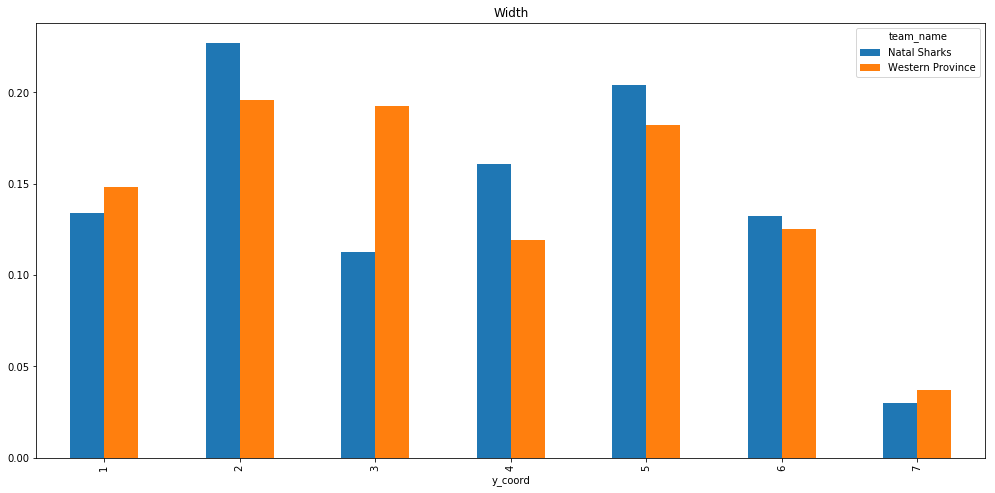

In [18]:
df.getTerritoryY(perc=True).plot(kind='bar',figsize=(17,8),title='Width')

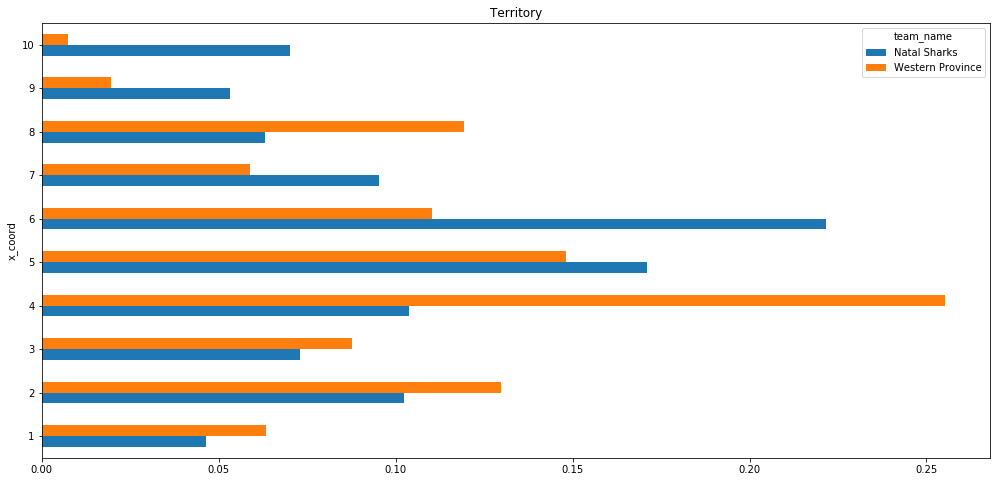

In [19]:
df.getTerritoryX(perc=True).plot(kind='barh',figsize=(17,8),title='Territory')

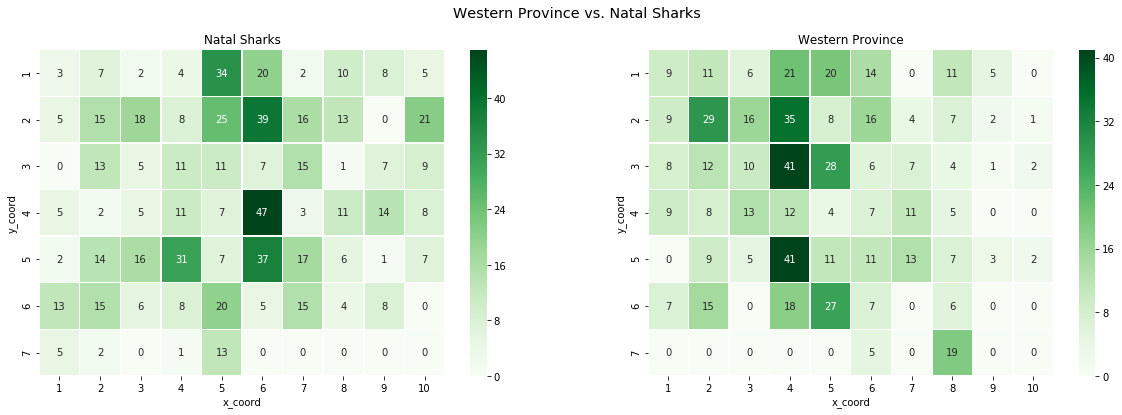

In [20]:
df.heat_map()

In [32]:
df.events.groupby('event').count()['action_id'].sort_values(ascending=False)

event
Tackle                 263
Pass                   196
Carry                  188
Ruck                   147
Collection              85
Possession              81
Sequence                73
Kick                    52
Offensive Scrum         48
Defensive Scrum         48
Attacking Qualities     40
Missed Tackle           33
Turnover                26
Scrum                   24
Lineout Throw           21
Lineout Take            20
Penalty Conceded        17
Period                  15
Ref Review              12
Restart                 12
Goal Kick               10
Maul                     8
Try                      2
Name: action_id, dtype: int64

In [33]:
df.events.groupby('event_type').count()['action_id'].sort_values(ascending=False)

event_type
Line Tackle                    179
Complete Pass                  161
Other Carry                     67
One Out Drive                   66
Scrum Half Pass                 40
Kick Return                     40
Scrum                           37
Lineout                         36
Defender Beaten                 33
Chase Tackle                    31
Defensive Loose Ball            24
50m Restart                     23
Pick And Go                     22
Other Tackle                    21
Guard Tackle                    21
Defensive Catch                 19
No 8 Pick Up                    15
Stepped                         15
Offload                         15
Box                             14
Territorial                     13
Restart Catch                   13
Turnover Won                    12
Bumped Off                      12
Touch Kick                      11
Support Carry                   11
Advantage                       11
Throw Middle                    10
Attacking

In [34]:
df.events.groupby('description').count()['action_id'].sort_values(ascending=False)

description
Crossed Gainline       66
Failed Gainline        58
Neutral                34
Kick In Play           32
Tackle Assist          18
Catch And Drive        16
Off The Top            14
Defence                12
Penalty Kick           11
Kick In Own 22          9
Catch And Pass          8
Retained Collection     6
Offence                 5
Negative                5
Initial Break           2
Positive                1
Name: action_id, dtype: int64

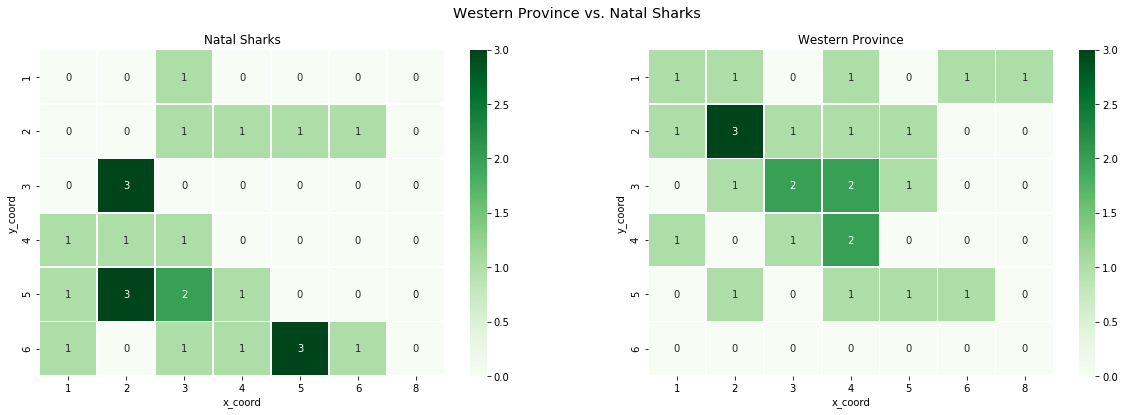

In [22]:
df.heat_map(event='Kick')

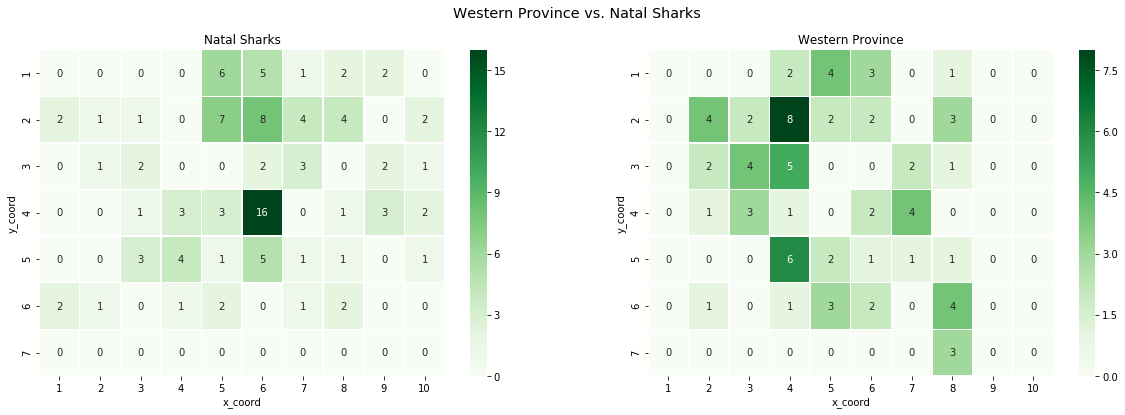

In [24]:
df.heat_map(event='Pass')

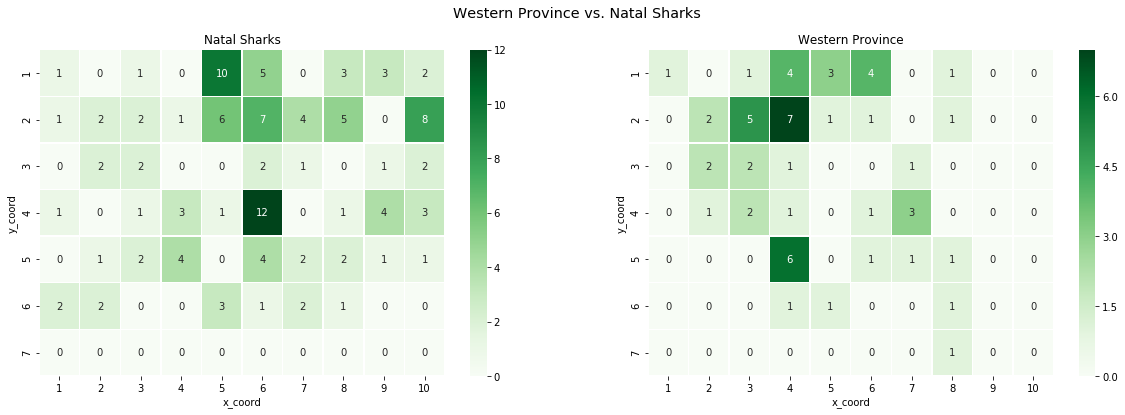

In [23]:
df.heat_map(event='Carry')

KeyError: 'Western Province'

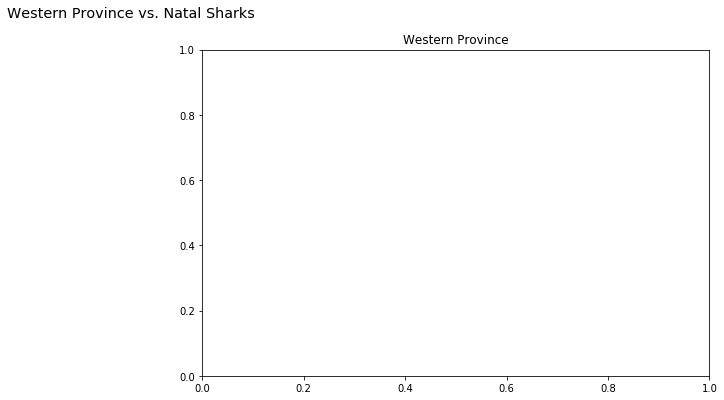

In [42]:
df.heat_map(event_type='Scrum Half Pass')

## Players

Produces a summary of each player with the option to normilised either via minutes, actions or phases. 

In [ ]:
df.player_summary(norm='mins')

In [ ]:
df.player_summary(norm='actions')

In [ ]:
df.player_summary(norm='phases')

In [ ]:
df.player_summary()

In [ ]:
df.